# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |      Nome     | 
|:-        |:-            |:-------------:|
|          |              |               |  
|          |              |               |  
|          |              |               |  
|          |              |               |  
|          |              |               |  
    

----
### Instruções

**1**. Leia atentamente esta seção e as descrições de cada exercício para garantir que você está executando o que foi pedido.
- O não atendimento de qualquer item descrito, implicará perda de nota.

**2**. O trabalho pode ser feito em grupos de até 5 pessoas.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 - Você deve submeter apenas o arquivo .ipynb.
 - O grupo poderá ser composto por pessoas de qualquer uma das três turmas de processamento de imagens
 
**3**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções
- comentar o código sempre que necessário

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos. 

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas. 
- Mesmo nos exercícios que limitam o uso de funções da OpenCV, considere que as operações básicas como abrir, transformar para outro formato de cor e salvar, podem ser feitas com as funções da biblioteca.

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados. 

**8**. Em todos os exercícios, plote na tela as mesmas imagens que o exercício pedir para salvar. 
- Não é permitido usar a função cv2.imshow() para plotar as imagens. Essa regra é para evitar incompatibilidade e prejudicar a correção. Sempre use a biblioteca matplotlib.

**9**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**10**. Em todos os exercícios você deve tratar tons de cinza inválidos usando a técnica de saturação, há não ser que seja explicitamente pedida outra técnica. Sempre tome cuidado para que as operações executadas não causem desequilíbrio de cores.

----
## Preparação 

Abaixo são inicializadas as bibliotecas e é definido o caminho das pasta **figs** onde estão as imagens usadas em cada exercício. É definido também o caminho da pasta **figs_resultado**, onde você deve salvar as imagens resultantes. 

Se for necessário, você pode alterar a variável que define esse caminho, porém use ela em todos os exercícios. 

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

pathFigs = "figs/" # path das imagens que devem ser usadas
pathRes = "figs_resultado/" # path da pasta onde as imagens devem ser salvas

# Cria uma pasta onde as imagens devem ser salvas, se ela não existir
if not os.path.isdir(pathRes):
    os.mkdir(pathRes)

----
## Exercicio 1
Faça uma função que receba dois parâmetros:
 - **imagem1**: uma imagem monocromática ou RGB
 - **imagem2**: uma imagem do mesmo tamanho que a imagem anterior, mas que seja toda preta e que possua apenas um retângulo na cor branca
    
Essa função deve retornar qual a quantidade mínima total de bytes que seria necessário para representar a região da **imagem1** que está localizada na mesma posição do retângulo da **imagem2**.

Teste sua função usando as imagens **figs/natureza.jpeg** e **figs/natureza_regiao.jpeg**.

Obs: não é permitido usar nenhuma função pronta da biblioteca OpenCV. 

104464.21494779391


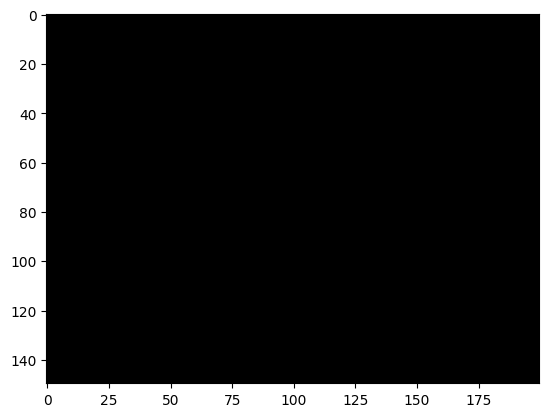

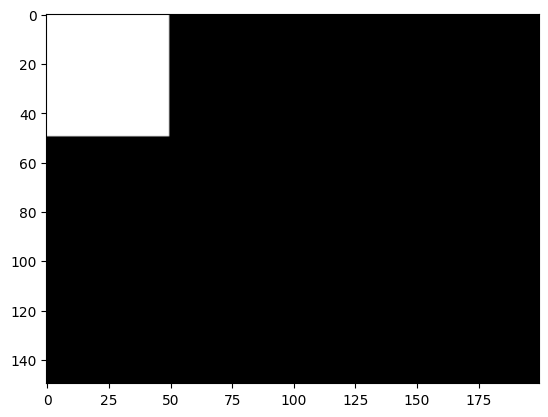

2500


In [2]:
imagem1 = cv2.imread(pathFigs + 'natureza.jpeg')
imagem2 = cv2.imread(pathFigs + 'natureza_regiao.jpeg')

altura = imagem2.shape[0]
largura = imagem2.shape[1]


def calculaTotalMinimoDeBytes(imagemA, imagemB):
    altura = imagemB.shape[0]
    largura = imagemB.shape[1]
    pixelBranco = imagemB.max()
    count = 0
    for i in np.arange(0, altura):
        for j in np.arange(0, largura):
            if imagemB[i, j, 0] == pixelBranco & imagemB[i, j, 1] == pixelBranco & imagemB[i, j, 2] == pixelBranco:
                count = count + 1
                
    if len(imagemA.shape)==2:
        return count*np.log2(imagemA.max() + 1 - imagemA.min())/8
    elif len(imagemA.shape)==3:
        return count*3*np.log2(imagemA.max() + 1 - imagemA.min())/8
    
print(calculaTotalMinimoDeBytes(imagem1, imagem2))

## Teste
imagem1teste = np.zeros([150,200,3], dtype=np.uint8)
plt.imshow(imagem1teste)
plt.show()

imagem2teste = np.zeros([150,200,3], dtype=np.uint8)

imagem2teste[0:50, 0:50, :] = [255, 255, 255]
plt.imshow(imagem2teste)
plt.show()

altura = imagem2teste.shape[0]
largura = imagem2teste.shape[1]
count = 0
for i in np.arange(0, altura):
    for j in np.arange(0, largura):
        if imagem2teste[i, j, 0] == 255 & imagem2teste[i, j, 1] == 255 & imagem2teste[i, j, 2] == 255:
            count = count + 1

print(count)

----
## Exercicio 2

Use as imagens **figs/procurado.jpg** e **figs/tripaSeca.png** para criar um cartaz de procurado igual ao apresentado na imagem na imagem **figs/tripaSeca_procurado.png**.

Você pode aplicar qualquer técnica aprendida na disciplina e qualquer sequência de operações para chegar no resultado esperado. Porém, sugere-se a seguinte sequência:
- Remova o texto do cartaz usando máscara de cor, conforme ensinado no notebook de operações aritméticas. Porém, em vez de aplicar na imagem inteira, selecione apenas a região onde está o texto para facilitar. 
- Ao remover o texto, ficarão marcas do texto antigo. Para removê-las, aplique algum filtro passa-baixa. 
- Adicione o texto novo usando a função putText da OpenCV
- Aplique um novo filtro passa-baixa para que a imagem do cartaz fique um pouco borrada de forma a similar a foto do personagem. 
- Aumente a imagem **figs/tripaSeca.png** para o rosto do personagem caber na região adequada da imagem **figs/procurado.jpg**. 
- Aplique equalização no rosto do personagem
- Adicione o rosto do personagem no cartaz

Salve a imagem resultante no caminho **figs_resultado/ex02_tripaSeca_procurado.png**

True

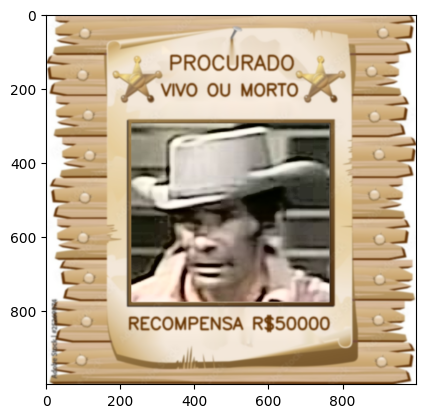

In [3]:
def filtro(imagem):
    imagem_suavizada = cv2.GaussianBlur(imagem, (9,9), 0)

    return imagem_suavizada

def remover_texto_recompensa(imagem, mascara):
    # Região onde está o texto
    x, y, largura_texto, altura_texto = 250, 797, 500, 90

    # Retângulo branco na região onde está o texto
    cv2.rectangle(mascara, (x, y), (x + largura_texto, y + altura_texto), (255, 255, 255), -1)

    # Máscara na imagem de fundo para remover o texto
    imagem_sem_texto = cv2.inpaint(imagem, mascara, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return imagem_sem_texto

def remover_texto_procurado(imagem, mascara):
    # Região onde está o texto
    x, y, largura_texto, altura_texto = 315, 80, 355, 115

    # Retângulo branco na região onde está o texto
    cv2.rectangle(mascara, (x, y), (x + largura_texto, y + altura_texto), (255, 255, 255), -1)

    # Região onde está o texto
    x, y, largura_texto, altura_texto = 313, 80, 30, 30

    # Retângulo branco na região onde está o texto
    cv2.rectangle(mascara, (x, y), (x + largura_texto, y + altura_texto), (255, 255, 255), -1)

    # Máscara na imagem de fundo para remover o texto
    imagem_sem_texto = cv2.inpaint(imagem, mascara, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return imagem_sem_texto

def remover_texto_morto_ou_vivo(imagem, mascara):
    # Região onde está o texto
    x, y, largura_texto, altura_texto = 295, 200, 398, 70

    # Retângulo branco na região onde está o texto
    cv2.rectangle(mascara, (x, y), (x + largura_texto, y + altura_texto), (255, 255, 255), -1)

    # Máscara na imagem de fundo para remover o texto
    imagem_sem_texto = cv2.inpaint(imagem, mascara, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return imagem_sem_texto

def adicionar_texto(imagem):
    cor = (0, 51, 102)

    cv2.putText(imagem, "PROCURADO", (330, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.8, cor, 3, cv2.LINE_AA)

    cv2.putText(imagem, "VIVO OU MORTO", (310, 220), cv2.FONT_HERSHEY_SIMPLEX, 1.5, cor, 3, cv2.LINE_AA)

    cv2.putText(imagem, "RECOMPENSA R$50000", (220, 850), cv2.FONT_HERSHEY_SIMPLEX, 1.5, cor, 3, cv2.LINE_AA)

def adicionar_rosto_cartaz(imagem_fundo, imagem_rosto):
    # Coordenadas onde o rosto será colocado no cartaz
    x_cartaz, y_cartaz = 230, 295

    # Coordenadas do rosto na imagem do rosto
    x_rosto, y_rosto, largura_rosto, altura_rosto = 370, 45, 120, 120

    # Recortar o rosto da imagem do rosto
    rosto_recortado = imagem_rosto[y_rosto:y_rosto+altura_rosto, x_rosto:x_rosto+largura_rosto]

    # Aumentar o tamanho do rosto
    nova_altura_rosto = int(altura_rosto * 4.01)
    nova_largura_rosto = int(largura_rosto * 4.45)
    rosto_recortado = cv2.resize(rosto_recortado, (nova_largura_rosto, nova_altura_rosto))

    # converte BGR para YUV
    imagemColoridaYUV = cv2.cvtColor(rosto_recortado, cv2.COLOR_BGR2YUV)

    # separa os canais
    Y, U, V = cv2.split(imagemColoridaYUV)

    YEqualizado = cv2.equalizeHist(Y)

    imgNova_YUV = cv2.merge( [YEqualizado, U, V] )

    rosto_recortado = cv2.cvtColor(imgNova_YUV, cv2.COLOR_YUV2BGR)

    # Colocar rosto no cartaz
    imagem_fundo[y_cartaz:y_cartaz+nova_altura_rosto, x_cartaz:x_cartaz+nova_largura_rosto] = rosto_recortado

    return imagem_fundo

imagem_fundo = cv2.imread(pathFigs + "procurado.jpg")
imagem_rosto = cv2.imread(pathFigs + "tripaSeca.png")

altura, largura, _ = imagem_fundo.shape

# Criar uma máscara de cor preta do mesmo tamanho da imagem de fundo
mascara = np.zeros((altura, largura), dtype=np.uint8)

# Aplicar a máscara à imagem de fundo para remover o texto
imagem_fundo = remover_texto_recompensa(imagem_fundo, mascara)
imagem_fundo = remover_texto_procurado(imagem_fundo, mascara)
imagem_fundo = remover_texto_morto_ou_vivo(imagem_fundo, mascara)

adicionar_texto(imagem_fundo)

imagem_fundo = filtro(imagem_fundo)

cartaz = adicionar_rosto_cartaz(imagem_fundo.copy(), imagem_rosto.copy())

plt.imshow(cv2.cvtColor(cartaz, cv2.COLOR_BGR2RGB))

# Salvar a imagem resultante
cv2.imwrite(pathRes + 'ex02_tripaSeca_procurado.png', cartaz)

----
## Exercicio 3

Remova o ruído da imagem **figs/faculdade.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem **figs/faculdade_corrigida.png**. 

Salve a imagem resultante no caminho **figs_resultado/ex03.png**.

----
## Exercicio 4

Crie uma matriz usando a biblioteca numpy. Depois, transforme essa matriz em uma imagem que corresponda a bandeira mostrada na figura **figs/bandeira.png**
 
Para gerar a bandeira, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **figs/simbolos.png**;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **figs/simbolos.png**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Salve a imagem resultante no caminho **figs_resultado/ex04_bandeira.png**

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

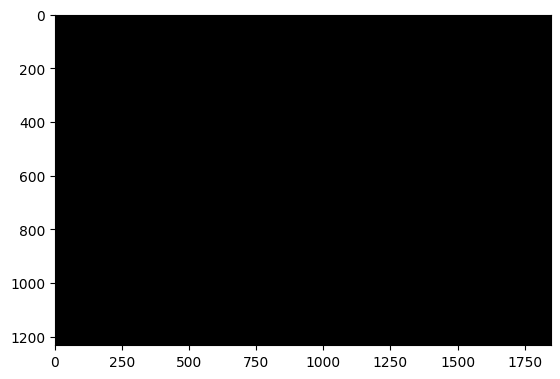

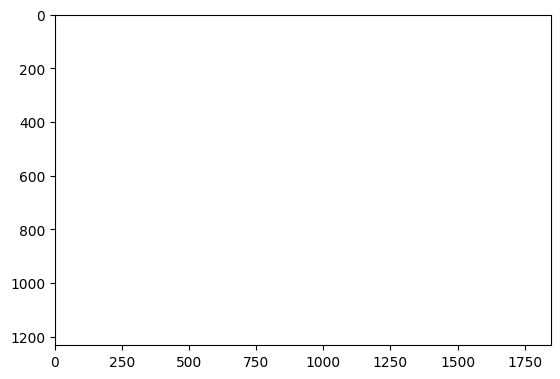

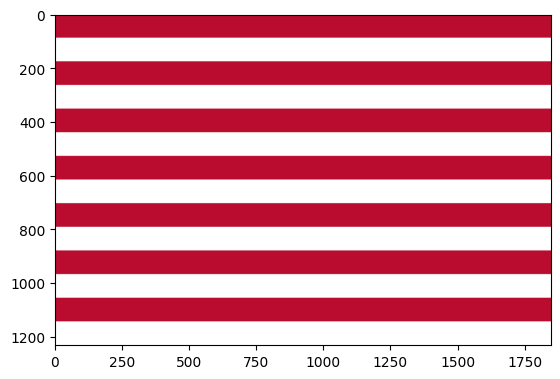

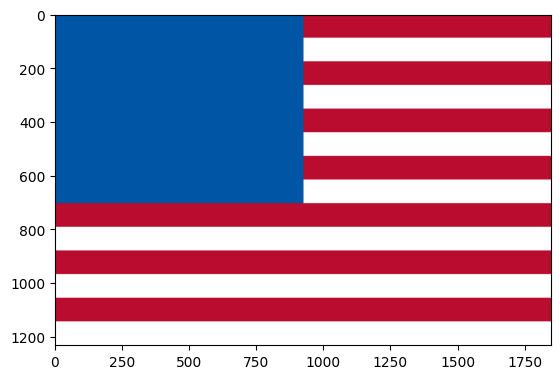

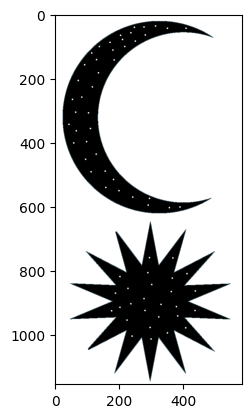

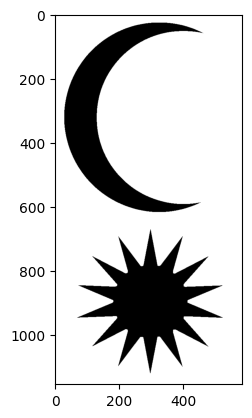

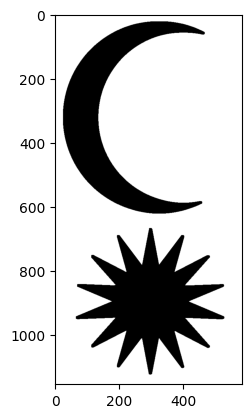

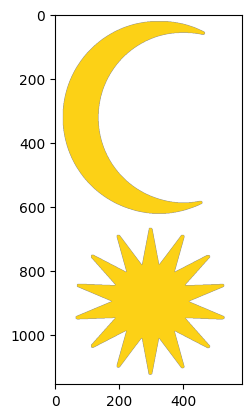

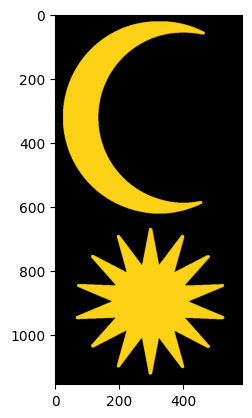

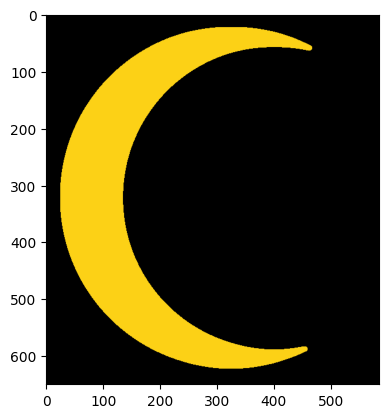

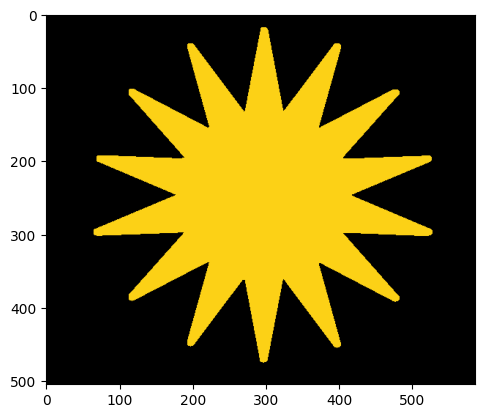

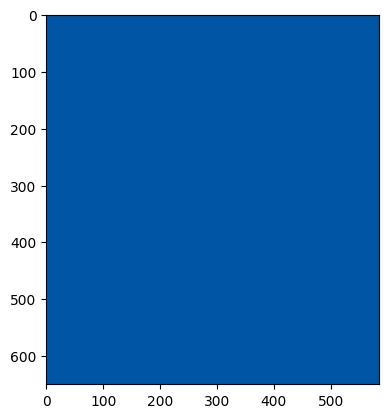

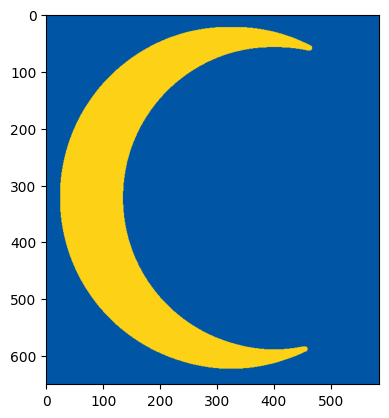

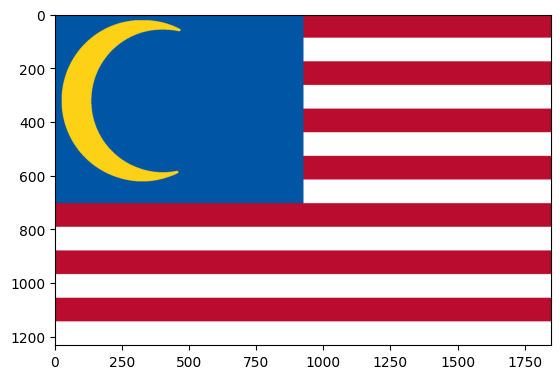

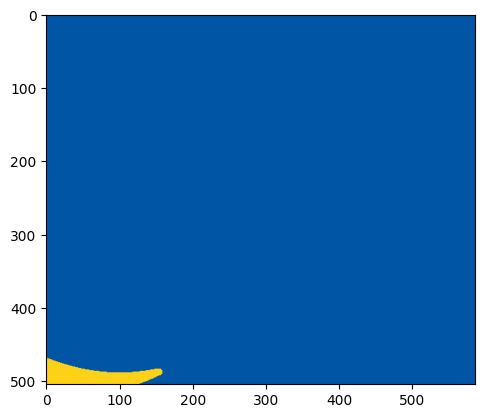

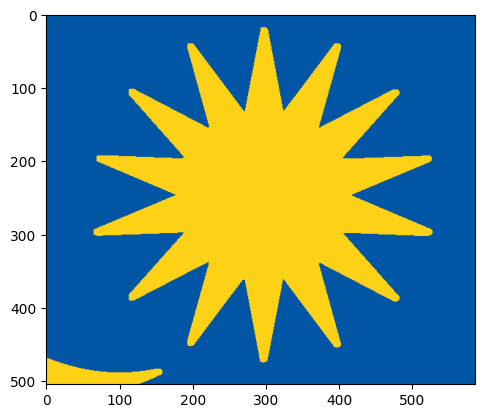

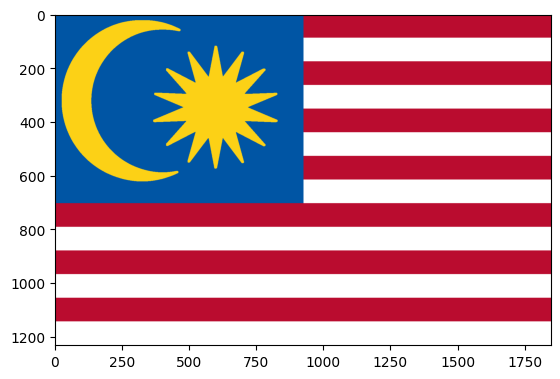

True

In [99]:
bandeira = np.zeros([1232,1848, 3], dtype=np.uint8)

altura = bandeira.shape[0]
largura = bandeira.shape[1]

plt.imshow(bandeira)
plt.show()

bandeira[:, :, :] = [255, 255, 255]

plt.imshow(bandeira)
plt.show()

alturaDaFaixa = (int)(altura/14)

for i in np.arange(0, altura, alturaDaFaixa*2):
    bandeira[i:i + alturaDaFaixa, :] = [186, 12, 47]

plt.imshow(bandeira)
plt.show()

bandeira[0:8*alturaDaFaixa,0:(int)(0.5*largura) , :] = [0,85,164]
plt.imshow(bandeira)
plt.show()

luaEstrela = cv2.imread(pathFigs + 'simbolos.png', cv2.IMREAD_UNCHANGED)
plt.imshow(luaEstrela)
plt.show()

elemEstrut2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

luaEstrelaErosao = cv2.erode(luaEstrela, elemEstrut2)

plt.imshow(luaEstrelaErosao)
plt.show()

luaEstrelaAbertura = cv2.dilate(luaEstrelaErosao, elemEstrut2)

plt.imshow(luaEstrelaAbertura)
plt.show()

luaEstrelaAberturaAmarelo = luaEstrelaAbertura.copy()

mascara = ((luaEstrelaAberturaAmarelo[:,:,3]) != 0)

luaEstrelaAberturaAmarelo[mascara] = [252, 209, 22,255]

plt.imshow(luaEstrelaAberturaAmarelo)
plt.show()



luaEstrelaAberturaPng = cv2.cvtColor(luaEstrelaAberturaAmarelo, cv2.COLOR_RGBA2RGB)
plt.imshow(luaEstrelaAberturaPng)
plt.show()


lua = luaEstrelaAberturaPng[0:650,:,:]
plt.imshow(lua)
plt.show()
estrela = luaEstrelaAberturaPng[650:,:,:]
plt.imshow(estrela)
plt.show()

imgBandeiraRec = bandeira[0:lua.shape[0], 0:lua.shape[1], :]
plt.imshow(imgBandeiraRec)
plt.show()


# cria uma máscara que pega qualquer pixel que não é preto
maskLua = ( (lua[:,:,0] > 0 ) |
         (lua[:,:,1] > 0 ) |
         (lua[:,:,2] > 0 ))

imgBandeiraRec[maskLua] = lua[maskLua]
plt.imshow(imgBandeiraRec)
plt.show()

bandeira[0:lua.shape[0], 0:lua.shape[1], :] = imgBandeiraRec
plt.imshow(bandeira)
plt.show()

iLin = 200-100
iCol = 500-200


imgBandeiraRec = bandeira[iLin:iLin + estrela.shape[0], iCol:iCol + estrela.shape[1], :]
plt.imshow(imgBandeiraRec)
plt.show()

maskEstrela = ( (estrela[:,:,0] > 0 ) |
         (estrela[:,:,1] > 0 ) |
         (estrela[:,:,2] > 0 ))

imgBandeiraRec[maskEstrela] = estrela[maskEstrela]
plt.imshow(imgBandeiraRec)
plt.show()

bandeira[iLin:iLin + estrela.shape[0], iCol:iCol + estrela.shape[1], :] = imgBandeiraRec
plt.imshow(bandeira)
plt.show()

cv2.imwrite(pathRes + 'ex04_bandeira.png', cv2.cvtColor(bandeira, cv2.COLOR_RGB2BGRA))


----
## Exercicio 5

Crie uma função que receba uma imagem e modifique ela para que fique quadrada. Se a imagem estiver na orientação paisagem, você precisará adicionar espaço na parte superior e inferior. Da mesma forma, para retrato (mais alto que largo), você adicionará espaço nas laterais. Certifique-se de que seu programa centralize a imagem entre o espaço.

Para preecher o novo espaço, você deverá testar apresentar as duas variações a seguir:
- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preenchê-lo com as $n$ linhas ou colunas vizinhas da imagem. Depois disso, você deverá aplicar uma filtro de média nessa região. 
 - Você deverá criar seu próprio filtro de média. Não é permitido usar nenhuma função pronta para isso. Considere sempre que será criado padding na imagem para que o filtro resulte em uma imagem do mesmo tamanho. Considere também que a máscara sempre será quadrada e com tamanho ímpar. 

- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preencher com a média de todos os valores RGB das $n$ linhas ou colunas vizinhas da imagem.

Teste a função nas imagens **figs/praia.jpg** e **figs/houses.jpg**. 
Salve as imagens resultante nos caminhos **figs_resultado/ex05_praia.png** e **figs_resultado/ex05_houses.png**.

Obs. Neste exercício, não é permitido usar usada nenhuma função pronta da OpenCV. Além disso, as únicas funções prontas do Numpy que podem ser usada são np.pad, np.mean, np.sum, np.ones e np.zeros. 


--------------------------
## Exercicio 6

Separe os círculos das linhas na **figs/circulos_retas.png**. Salve as imagens resultantes nos caminhos **figs_resultado/circulo.png** e **figs_resultado/linha.png**. A imagem **figs_resultado/ex06_circulo.png** deve conter apenas círculos e a imagem **figs_resultado/ex06_linha.png** deve conter apenas linhas. Para conseguir separar os objetos, você só pode aplicar operações morfológicas, limiarização, operações aritméticas (soma, subtração, etc), operações lógicas (AND, OR, etc) e rotação. 

Obs. A biblioteca OpenCV só pode ser usada para criar erosão,  dilatação e para criar os elementos estruturantes. Qualquer outra operação morfológica deve ser feita combinando erosão ou dilatação, sem usar nenhuma função pronta. 

A biblioteca OpenCV também pode ser usada para fazer operações lógicas, operações aritméticas e rotação.  

--------------------------

----
## Exercicio 7

Com base nas noções de vizinhança, adjacência e componentes conexos ensinados na disciplina, crie uma função que receba uma imagem com cores preto e branco e conte quando objetos brancos existem nela. Considere uma conectividade-4. 

Teste sua função na imagem **figs/circles.png**

----
## Exercicio 8

Extraia os contornos da rachadura da imagem **figs/rachadura.jpg**. Para isso, é permitido aplicar apenas as seguintes operações: alguma técnica de segmentação, alguma técnica de limiarização automática e algum filtro. 
 - Limite-se aos métodos ensinados na disciplina
 
O resultado mínimo esperado é apresentado na imagem **figs_resultado/rachadura_contorno.png**

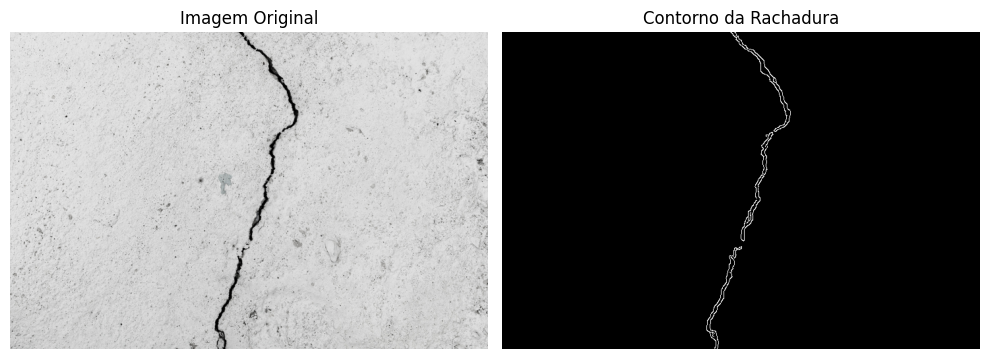

In [5]:
def canny(img):

  img = img.copy()

  imgGray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )

  ksize = 3
  imgGauss = cv2.GaussianBlur( imgGray,
                          ksize = (ksize,ksize),
                          sigmaX = 1)

  imgCanny = cv2.Canny( imgGauss, threshold1 = 100,
                        threshold2 = 650)

  return imgCanny

imagem = cv2.imread(pathFigs + "rachadura.jpg")

imagem_contorno = canny(imagem)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contorno da Rachadura')
plt.imshow(imagem_contorno, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()